# How to do local post-hoc analysis using mle-logging

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'ratio_proven'}, xlabel='num_iterations', ylabel='ratio_proven'>)

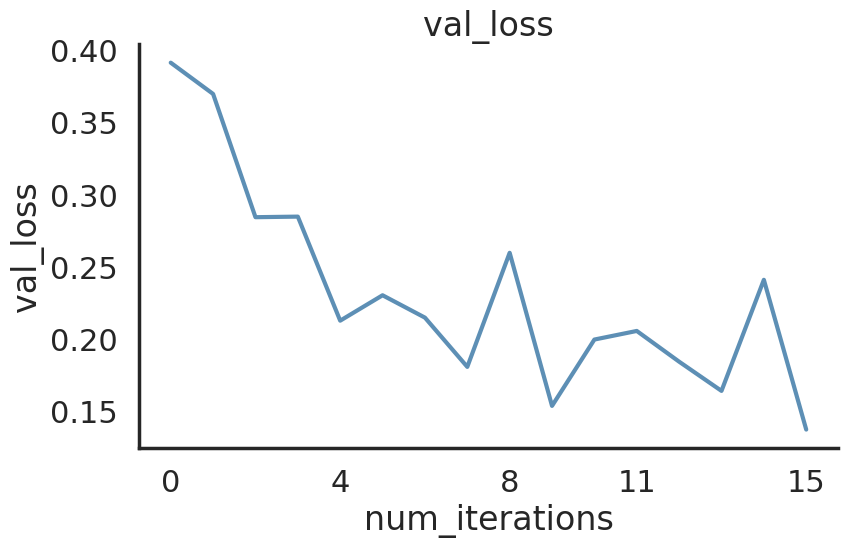

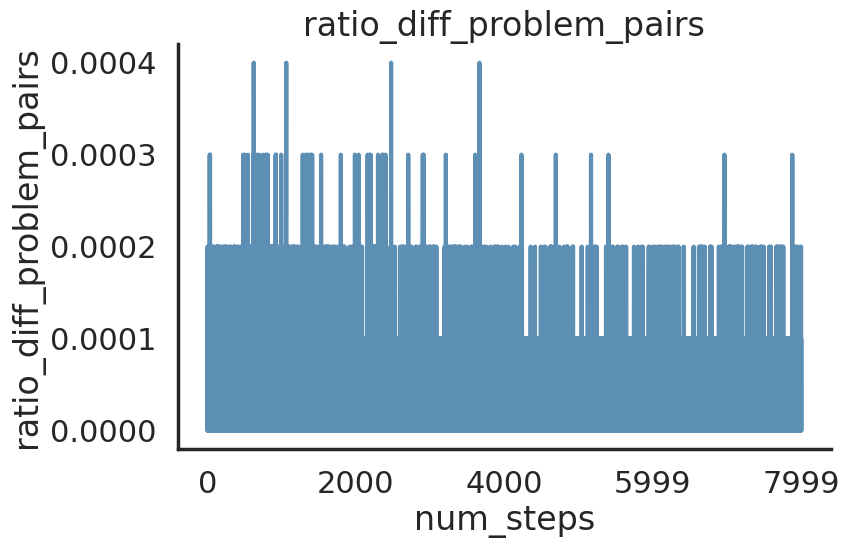

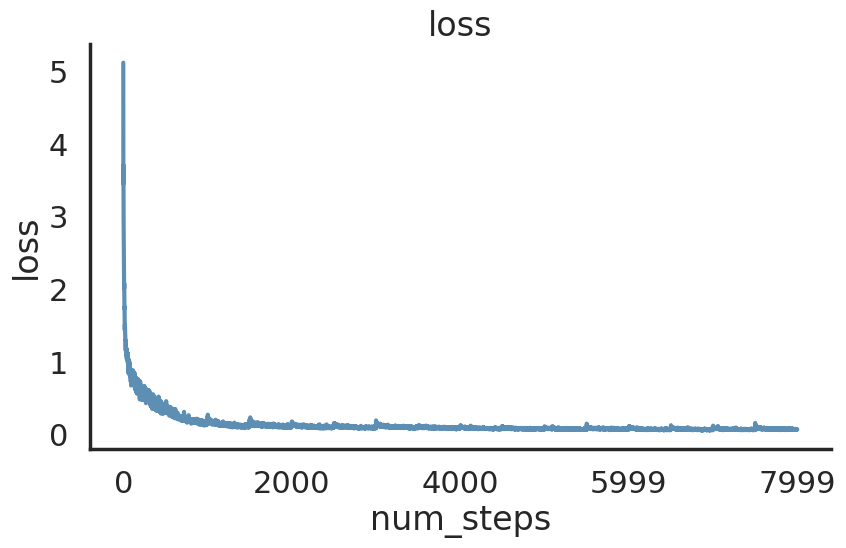

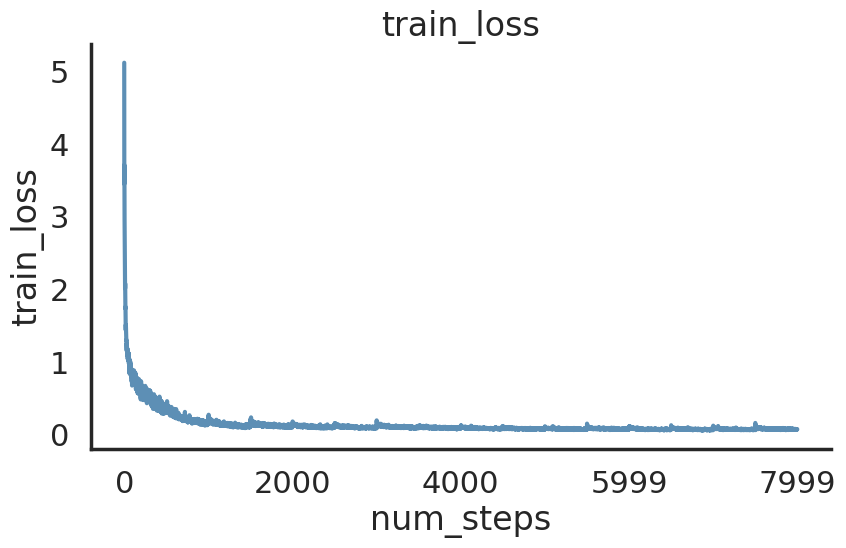

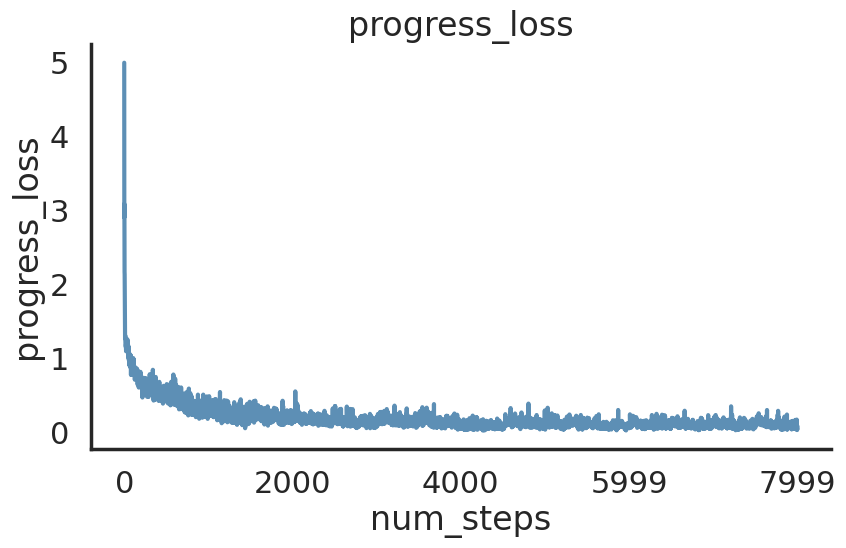

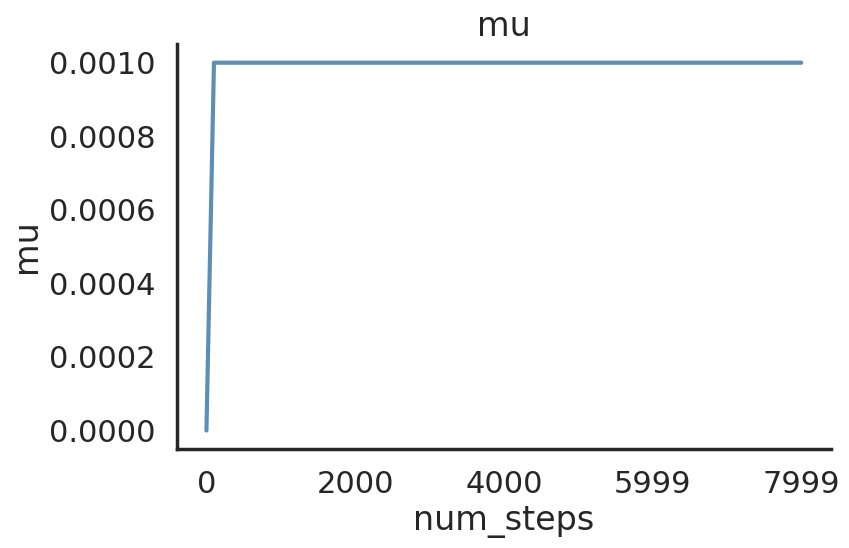

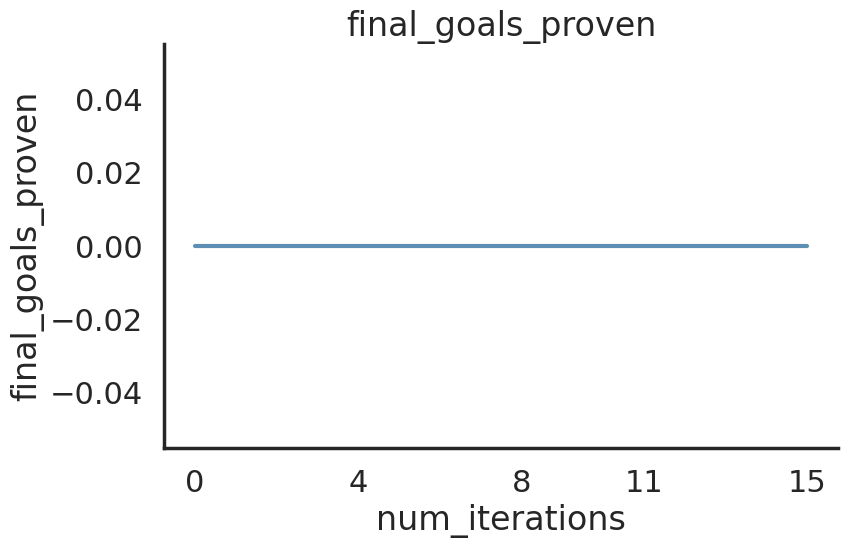

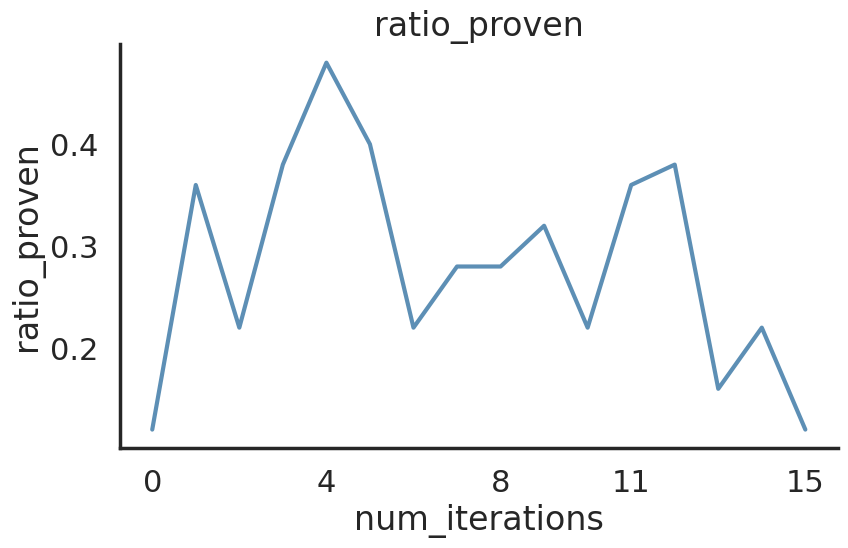

In [1]:
# plot mle_logging results
from mle_logging.load.load_log import load_log

logging_dir = "/home/aih/franz.srambical/gc-minimo/learning/outputs/2024-11-07/19-26-32/experiment_dir/logs/log_no_seed_provided.hdf5"
log = load_log(logging_dir, reload_log=True)
log.plot("val_loss", "num_iterations")
log.plot("ratio_diff_problem_pairs", "num_steps")
log.plot("loss", "num_steps")
log.plot("train_loss", "num_steps")
log.plot("progress_loss", "num_steps")
log.plot("mu", "num_steps")
log.plot("final_goals_proven", "num_iterations")
log.plot("ratio_proven", "num_iterations")


(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'ratio_proven'}, xlabel='num_iterations', ylabel='ratio_proven'>)

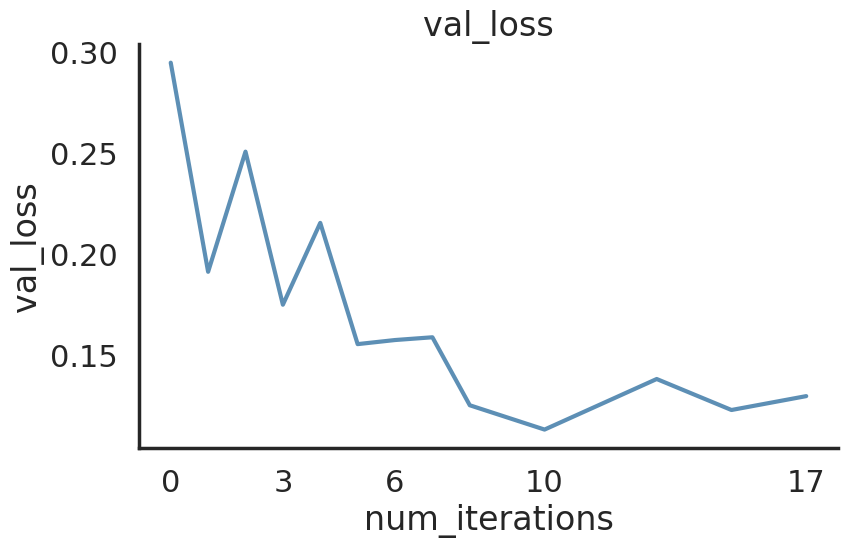

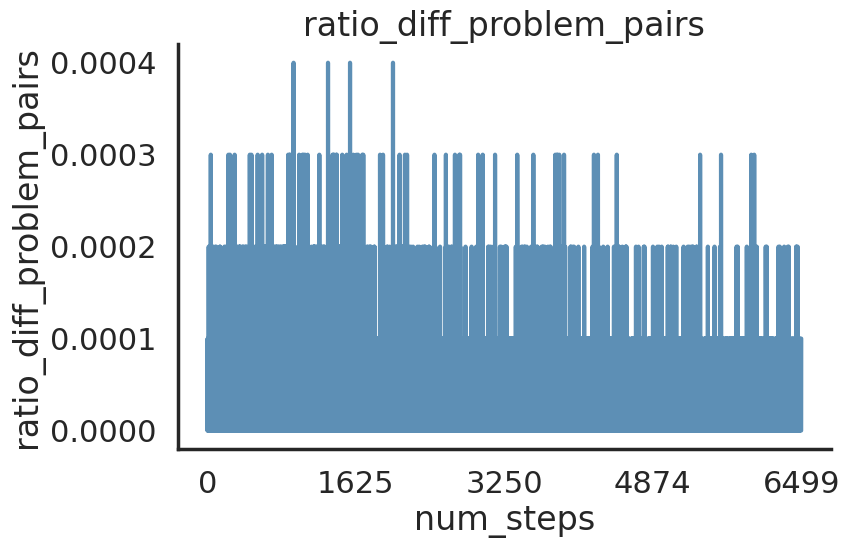

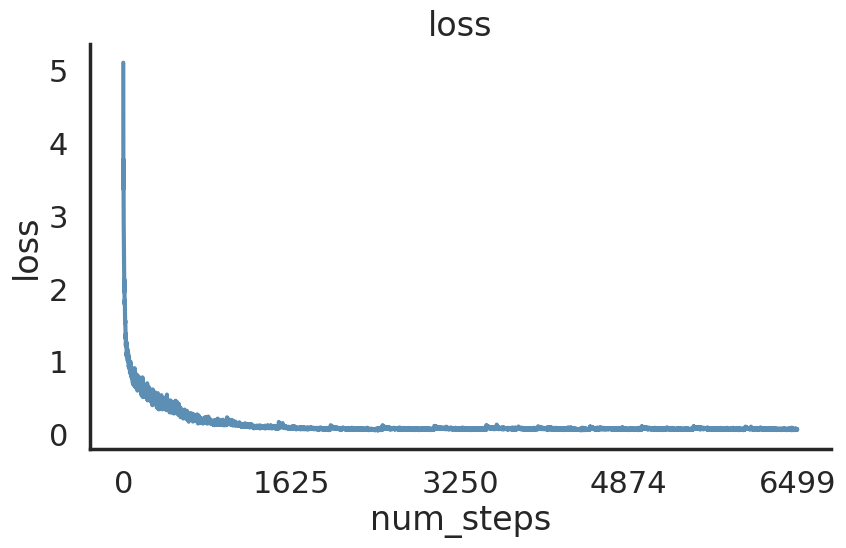

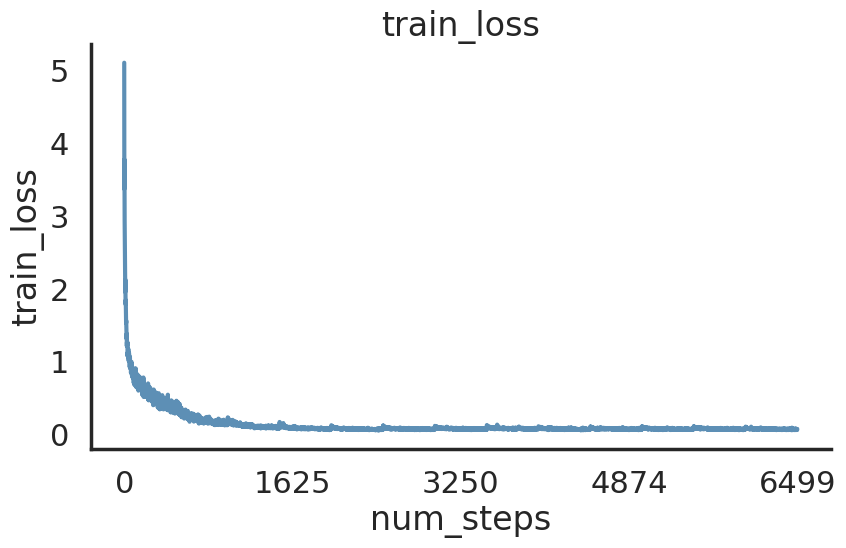

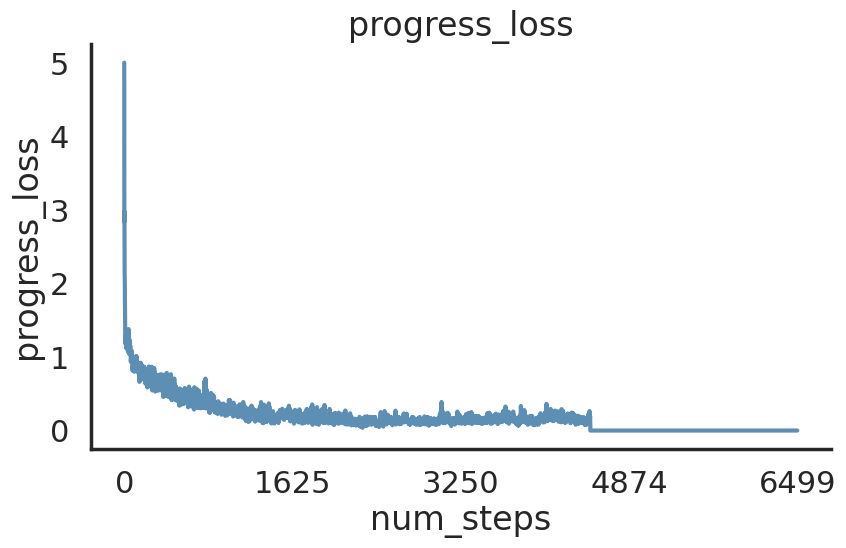

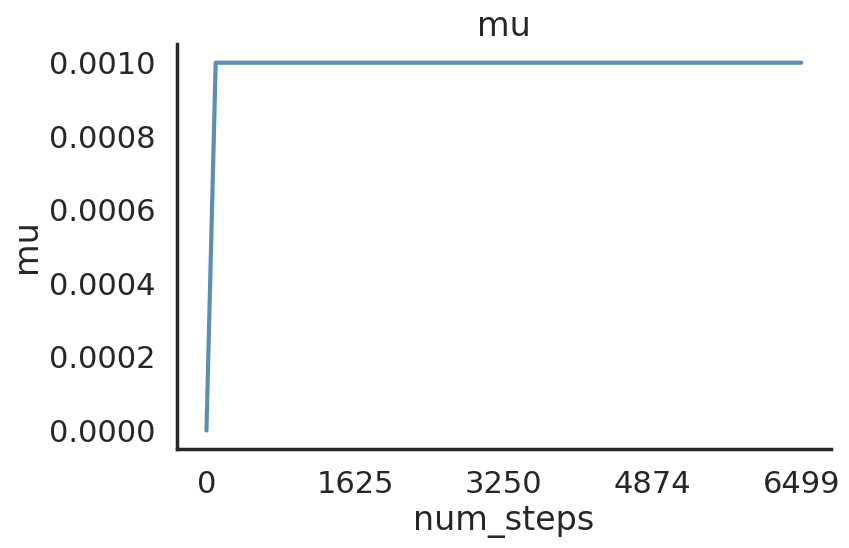

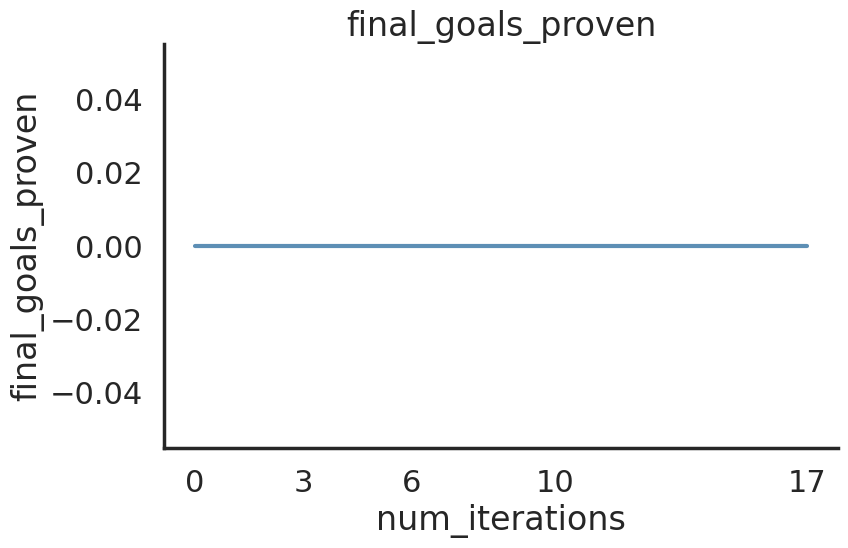

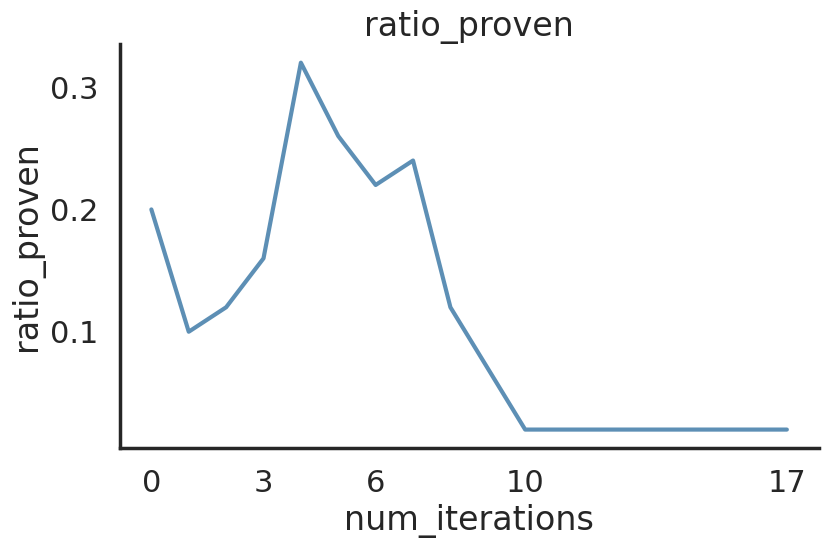

In [2]:
logging_dir = "/home/aih/franz.srambical/gc-minimo/learning/outputs/2024-11-07/19-26-36/experiment_dir/"
log = load_log(logging_dir, reload_log=True)
log.plot("val_loss", "num_iterations")
log.plot("ratio_diff_problem_pairs", "num_steps")
log.plot("loss", "num_steps")
log.plot("train_loss", "num_steps")
log.plot("progress_loss", "num_steps")
log.plot("mu", "num_steps")
log.plot("final_goals_proven", "num_iterations")
log.plot("ratio_proven", "num_iterations")

# Experiments

Experiment: We have shown that `mu>0` outperforms `mu=0` -- and therefore minimo -- on the validation loss. However, we used an arbitrary value for the threshold. As a next experiment, we will sweep thresholds.

Result: The `progress_loss` is 0 in all but the lowest-threshold runs (`threshold=0.1`, `threshold=0.2`). Validation loss decreases the fastest on the run that has a positive progress loss for the longest. Thus, we have shown that using a loss on the final problem conditioned on `difficulty=hard` leads to faster convergence to policies that solve the final problem. However, since the validation loss is not a perfect metric, we should design an experiment that is nontrivially solvable by both minimo and gc-minimo and show that using goal-conditioning leads to solutions to the final problem much faster.

Experiment: We are going to show that warming up mu leads to substantially more stable training at the beginning of the run. Therefore, we sweep `mu_warmup`

Result:

Experiment: In order to sanity-check our seeding, we run the exact same configuration twice, and expect that the logs will be *exactly* the same.
The only reason why this wouldn't be the case is if the looping with `peano` leads to non-deterministisms that we cannot overcome (wandb run name: logging_sanity_check).

Result: 

1. We run the exact same configuration with and without the new logging approach in the `mle-logging` branch and make sure that the plots are *exactly* the same in order to show that `mle-logging` is safe to merge.

2. `mle-logging` leads to substantially more `RuntimeError: peano::python::PyProofAction is unsendable, but is being dropped on another thread` errors. We want to know whether this makes the training slow down. Thus, we plot `num_iterations` against `wall clock time (relative)`.

Experiment: As a baseline experiment, we want to check whether we can omit the threshold entirely (`threshold=0`) such that the model always uses an auxiliary loss which is a fractionally scaled version of the model's loss on generating the final goals conditioned on `Conj:(hard)`.

In [11]:
!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=0 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_0"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=1e-1 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_1e-1"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=1e-2 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_1e-2"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=1e-3 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_1e-3"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=1e-4 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_1e-4"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.policy.batch_size=10000 difficulty_buckets=[{hard:50},{easy:70},{triv:100}] agent.policy.train_iterations=500 agent.policy.total_iterations=1000 agent.policy.mu=1e-5 goals=nat-add-synthetic agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=threshold_0_mu_sweep_mu_1e-5"



Submitted batch job 29215264
Submitted batch job 29215265
Submitted batch job 29215266
Submitted batch job 29215267
Submitted batch job 29215268
Submitted batch job 29215269


Result:

Experiment: Find a final problem that is nontrivially solvable by both minimo and gc-minimo and show that gc-minimo leads to solutions to the final problem much faster than minimo. Show that the validation loss of minimo is much higher than of gc-minimo.

Result:

Experiment: Find a final problem that is nontrivially solvable by gc-minimo, and not solvable by minimo using a time limit of 24 hours. Show that validation loss of minimo is much higher than of gc-minimo.

Result:

Experiment: Try to solve an easier goal which is attainable with fewer MCTS steps and num_conjectures

In [ ]:
!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=15 agent.max_mcts_nodes=50 agent.policy.batch_size=10000 agent.policy.train_iterations=150 agent.policy.total_iterations=1000 agent.policy.mu=0 goals=nat-add-zeros agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-zero_threshold_0_mu_0"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=15 agent.max_mcts_nodes=50 agent.policy.batch_size=10000 agent.policy.train_iterations=150 agent.policy.total_iterations=1000 agent.policy.mu=1e-1 goals=nat-add-zeros agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-zero_threshold_0_mu_1e-1"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=15 agent.max_mcts_nodes=50 agent.policy.batch_size=10000 agent.policy.train_iterations=150 agent.policy.total_iterations=1000 agent.policy.mu=1e-2 goals=nat-add-zeros agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-zero_threshold_0_mu_1e-2"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=15 agent.max_mcts_nodes=50 agent.policy.batch_size=10000 agent.policy.train_iterations=150 agent.policy.total_iterations=1000 agent.policy.mu=1e-3 goals=nat-add-zeros agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-zero_threshold_0_mu_1e-3"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=15 agent.max_mcts_nodes=50 agent.policy.batch_size=10000 agent.policy.train_iterations=150 agent.policy.total_iterations=1000 agent.policy.mu=1e-4 goals=nat-add-zeros agent.policy.threshold=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-zero_threshold_0_mu_1e-4"


Result:

Experiment: This is a configuration that Mihir has gotten to solve the problem. We want to check whether the model can reliably solve the problem across seeds.


In [ ]:
!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.expansions=500 agent.policy.batch_size=10000 agent.policy.train_iterations=500 agent.policy.total_iterations=50 agent.policy.mu=0.001 difficulty_buckets=[{hard:20},{easy:50},{triv:100}] goals=nat-add-zeros agent.policy.threshold=0.2 seed=0 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-solved_reproduction_seed_0"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.expansions=500 agent.policy.batch_size=10000 agent.policy.train_iterations=500 agent.policy.total_iterations=50 agent.policy.mu=0.001 difficulty_buckets=[{hard:20},{easy:50},{triv:100}] goals=nat-add-zeros agent.policy.threshold=0.2 seed=1 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-solved_reproduction_seed_1"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.expansions=500 agent.policy.batch_size=10000 agent.policy.train_iterations=500 agent.policy.total_iterations=50 agent.policy.mu=0.001 difficulty_buckets=[{hard:20},{easy:50},{triv:100}] goals=nat-add-zeros agent.policy.threshold=0.2 seed=2 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-solved_reproduction_seed_2"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.expansions=500 agent.policy.batch_size=10000 agent.policy.train_iterations=500 agent.policy.total_iterations=50 agent.policy.mu=0.001 difficulty_buckets=[{hard:20},{easy:50},{triv:100}] goals=nat-add-zeros agent.policy.threshold=0.2 seed=3 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-solved_reproduction_seed_3"

!es-gpu.sh "apptainer run ../gc-minimo.sif bootstrap.py theory=nat-add n_conjectures=50 agent.max_mcts_nodes=200 agent.expansions=500 agent.policy.batch_size=10000 agent.policy.train_iterations=500 agent.policy.total_iterations=50 agent.policy.mu=0.001 difficulty_buckets=[{hard:20},{easy:50},{triv:100}] goals=nat-add-zeros agent.policy.threshold=0.2 seed=4 job.use_wandb=True job.wandb_key=$WANDB_KEY job.wandb_entity=p-doom job.wandb_run_name=nat-add-solved_reproduction_seed_4"